In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Multiplos Plots

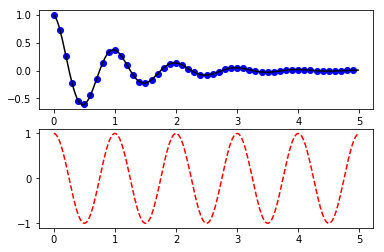

In [2]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

t_1 = np.arange(0.0,5.0,0.1)
t_2 = np.arange(0.0,5.0,0.02)

plt.figure()
plt.subplot(2,1,1)
plt.plot(t_1, f(t_1), 'bo', t_2, f(t_2), 'k')

plt.subplot(2,1,2)
plt.plot(t_2, np.cos(2*np.pi*t_2), 'r--')
plt.show()

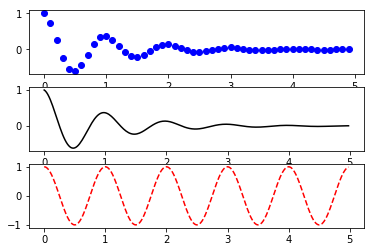

In [3]:
plt.figure()
ax = plt.subplot(3,1,1)
plt.plot(t_1,f(t_1),'bo')

plt.subplot(3,1,2, sharey=ax)
plt.plot(t_2, f(t_2), 'k')


plt.subplot(3,1,3)
plt.plot(t_2, np.cos(2*np.pi*t_2), 'r--')

plt.show()

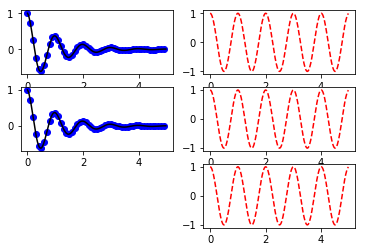

In [4]:
plt.figure()
plt.subplot(321)
plt.plot(t_1, f(t_1), 'bo', t_2, f(t_2), 'k')


plt.subplot(322)
plt.plot(t_2, np.cos(2*np.pi*t_2), 'r--')


plt.subplot(324)
plt.plot(t_2, np.cos(2*np.pi*t_2), 'r--')


plt.subplot(323)
plt.plot(t_1, f(t_1), 'bo', t_2, f(t_2), 'k')


plt.subplot(326)
plt.plot(t_2, np.cos(2*np.pi*t_2), 'r--')


plt.show()

# Trabalhando com Texto

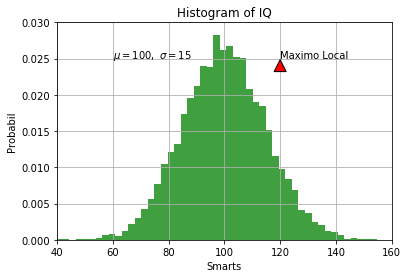

In [5]:
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probabil')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100, \ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.annotate('Maximo Local', xy=(120,.025), arrowprops=dict(facecolor='red', shrink=.5),)
plt.grid(True)
plt.show()

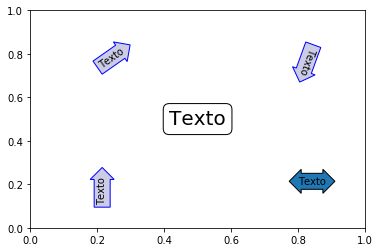

In [6]:
plt.figure()
box_config = dict(boxstyle="round", fc='w')
plt.text(.5,.5, 'Texto', ha='center', va='center',size=20, bbox=box_config)

box_2 = dict(boxstyle='rarrow', fc=(0.8, 0.8, 0.9), ec='b')
plt.text(.8,.8, 'Texto', bbox=box_2, rotation=250)
plt.text(.2,.2, 'Texto', bbox=box_2, rotation=90)
plt.text(.2,.8, 'Texto', bbox=box_2, rotation=35)

box_3 = dict(boxstyle='DArrow')
plt.text(.8,.2, 'Texto', bbox=box_3)


plt.show()

# Axis

<Figure size 1008x1296 with 0 Axes>

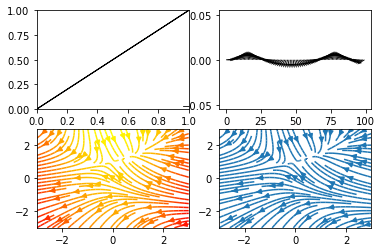

In [57]:
plt.figure(figsize=(14,18))
fig, axes = plt.subplots(nrows=2, ncols=2)
#--------------------------
x = np.linspace(0,10,100)
y = np.cos(x)
z = np.sin(x)
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
#------------------------
axes[0,0].arrow(0,0,1,1)
axes[0,1].quiver(y,z)
axes[1,1].streamplot(X,Y,U,V)
axes[1,0].streamplot(X,Y,U,V, color=U, cmap='autumn')

plt.show()


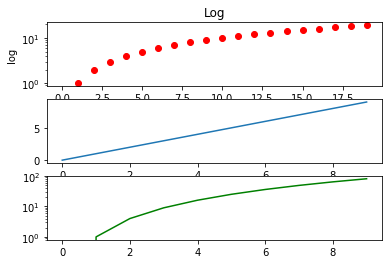

In [82]:

f, axes = plt.subplots(3,1)



axes[0].plot(np.arange(0,20), 'ro')
axes[0].set_yscale('log')
axes[0].xaxis.labelped=10
axes[0].set_title('Log')
axes[0].set_ylabel('log')

axes[1].plot(np.arange(0,10))



axes[2].plot(np.arange(0,10)**2, 'green')
axes[2].set_yscale('log')


plt.show()





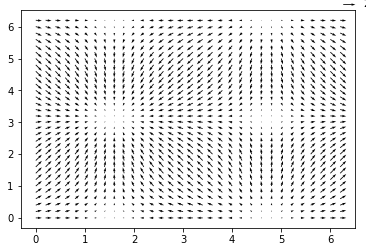

In [58]:
X, Y = np.meshgrid(np.arange(0,2*np.pi, 0.2), np.arange(0, 2*np.pi, 0.2))
U = np.cos(X)
V = np.sin(Y)
fig1, ax1 = plt.subplots()
Q = ax1.quiver(X, Y, U, V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E', coordinates='figure')

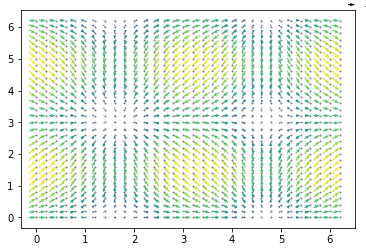

In [60]:
fig2, ax2 = plt.subplots()
M = np.hypot(U,V)
Q = ax2.quiver(X,Y,U,V,M, units='x', pivot='tip', width=0.022, scale=1/0.15)
qk = ax2.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')
ax2.scatter(X,Y, color='0.5', s=1)
plt.show()

# 3D plotting

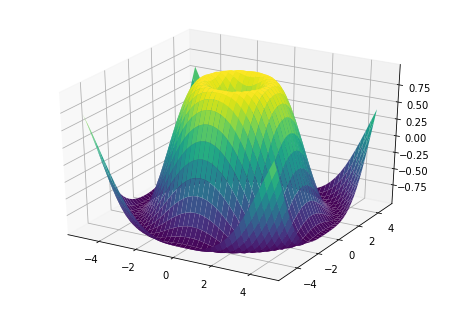

In [63]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()


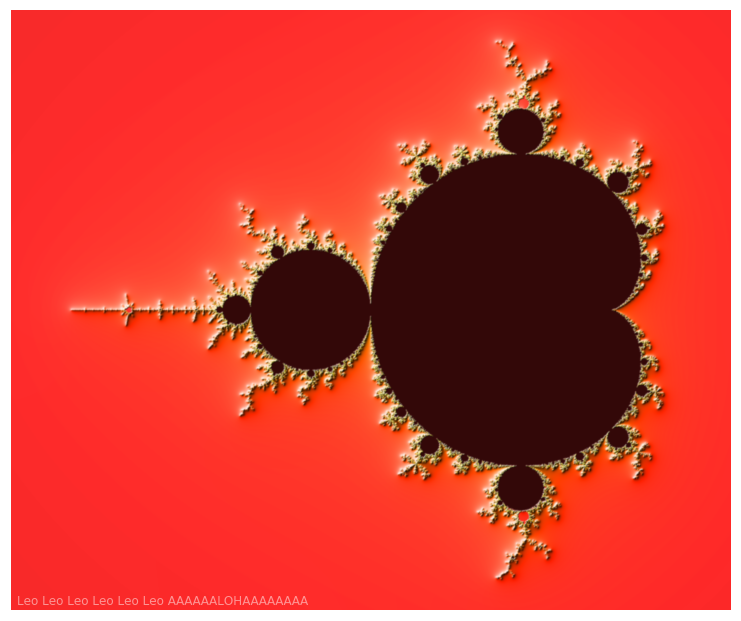

In [71]:
def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000 // 2
    ymin, ymax, yn = -1.25, +1.25, 2500 // 2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log2(np.log(horizon))
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    year = time.strftime("%Y")
    text = ("Leo Leo Leo Leo Leo Leo AAAAAALOHAAAAAAAA")
            
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()